# Sea level predicator

<hr style="border:2px solid blue"/>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('sea_level_data.csv')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


<hr style="border:2px solid blue"/>

# Plotting the scatter plot

Text(0, 0.5, 'Sea Level (inches)')

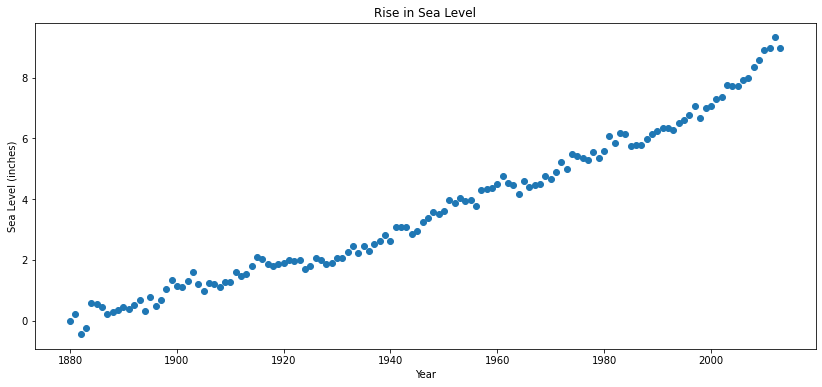

In [4]:
plt.rcParams["figure.figsize"] = (14, 6)

fig, ax  = plt.subplots()
plt.title('Rise in Sea Level')

ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')

<hr style="border:2px solid blue"/>

# Plotting linregress to predicate the sea level in 2050

### From the first appointment

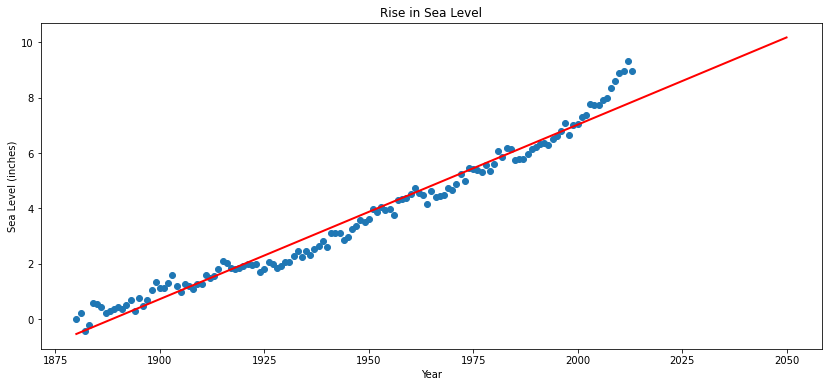

In [5]:
first_to_2050 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_first_to_2050 = np.arange(df['Year'].min(), 2051)
y_first_to_2050 = x_first_to_2050 * first_to_2050.slope + first_to_2050.intercept

ax.plot(x_first_to_2050 , y_first_to_2050, linewidth=2, color='red')
fig

### From the year 2000

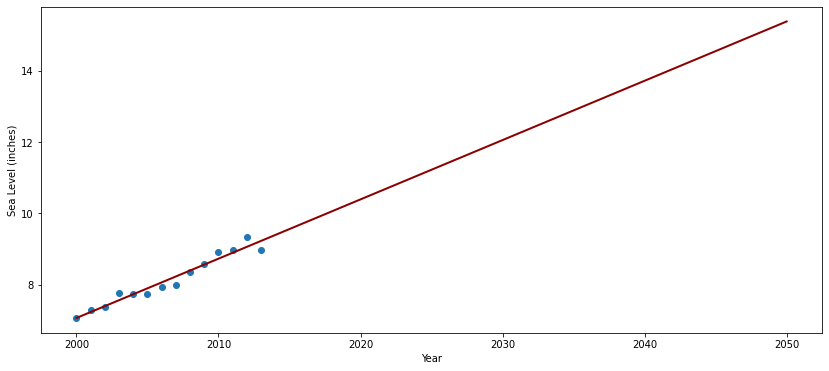

In [6]:
df_from_2000 = df.loc[df['Year'] >= 2000]

plt.scatter(df_from_2000['Year'], df_from_2000['CSIRO Adjusted Sea Level'])
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

_2000_to_2050 = linregress(df_from_2000['Year'], df_from_2000['CSIRO Adjusted Sea Level'])
x_2000_to_2050 = np.arange(2000, 2051)
y_2000_to_2050 = x_2000_to_2050 * _2000_to_2050.slope + _2000_to_2050.intercept

plt.plot(x_2000_to_2050, y_2000_to_2050, linewidth=2, color='darkred')

### Final chart

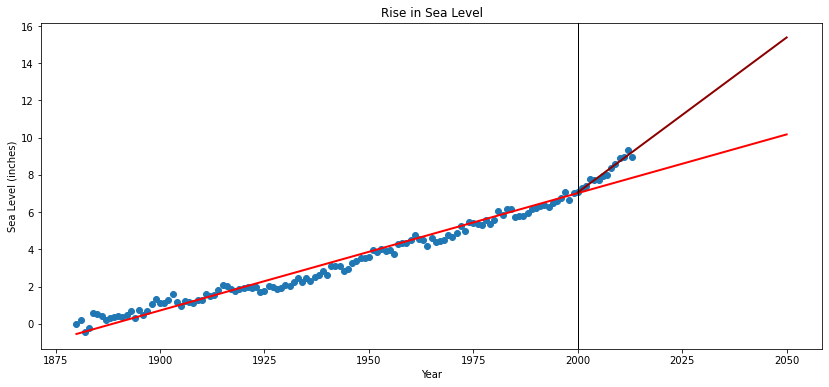

In [7]:
ax.plot(x_2000_to_2050, y_2000_to_2050, linewidth=2, color='darkred')
ax.axvline(2000, linewidth=1, color='black')
fig